# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Цели проекта:</b>

Научиться определять рыночную стоимость объектов недвижимости.

<b>Задачи проекта:</b>
1. Провести предобработку данных.
2. Посчитать и добавить новые столбцы в данные.
3. Ответить на вопросы
    - Как быстро продавались квартиры?
    - Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    - Какая средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?
    - Какая средня цена каждого километра в Санкт-Петербурге?
4. Сделать общие выводы.

<b>Данные:</b>

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет

<b>Описание данных</b>  
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
- balcony — число балконов  
- ceiling_height — высота потолков (м)  
- cityCenters_nearest — расстояние до центра города (м)  
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
- first_day_exposition — дата публикации  
- floor — этаж  
- floors_total — всего этажей в доме  
- is_apartment — апартаменты (булев тип)  
- kitchen_area — площадь кухни в квадратных метрах (м²)  
- last_price — цена на момент снятия с публикации  
- living_area — жилая площадь в квадратных метрах (м²)  
- locality_name — название населённого пункта  
- open_plan — свободная планировка (булев тип)  
- parks_around3000 — число парков в радиусе 3 км  
- parks_nearest — расстояние до ближайшего парка (м)  
- ponds_around3000 — число водоёмов в радиусе 3 км  
- ponds_nearest — расстояние до ближайшего водоёма (м)  
- rooms — число комнат  
- studio — квартира-студия (булев тип)  
- total_area — общая площадь квартиры в квадратных метрах (м²)  
- total_images — число фотографий квартиры в объявлении  

<b>СОДЕРЖАНИЕ</b>
1. <a href="#first">Открытие файла с данными и изучение общей информации</a>  
    1.1. <a href="#first-first">Импорт pandas. Запись данных в data</a>  
    1.2. <a href="#first-second">Изучение файла</a> 
2. <a href="#second">Предобработка данных</a>  
    2.1. <a href="#second-first">Пропущенные значения</a>  
    2.2. <a href="#second-second">Тип данных</a>  
    2.3. <a href="#second-third">Уникальные значения. Работа с дубликатами</a>  
    2.4. <a href="#second-fourth">Аномальные значения</a>  
3. <a href="#third">Посчитайте и добавьте в таблицу новые столбцы</a>  
    3.1. <a href="#third-first">Новый столбец: цена за 1 кв.м.</a>  
    3.2. <a href="#third-second">Новый столбец: день публикации объявления</a>  
    3.3. <a href="#third-third">Новый столбец: месяц публикации объявления</a>  
    3.4. <a href="#third-fourth">Новый столбец: год публикации объявления</a>  
    3.5. <a href="#third-fifth">Новый столбец: тип этажа квартиры</a>  
    3.5. <a href="#third-sixth">Новый столбец: расстояние до центра города в км</a>  
4. <a href="#fourth">Проведите исследовательский анализ данных</a>  
    4.1. <a href="#fourth-first">Изучаем параметры</a>  
    4.2. <a href="#fourth-second">Как быстро продавались квартиры (столбец days_exposition)</a>  
    4.3. <a href="#fourth-third">Какие факторы больше всего влияют на общую (полную) стоимость объекта</a>  
    4.4. <a href="#fourth-fourth">Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a>  
    4.5. <a href="#fourth-fifth">Средня цена каждого километра в Санкт-Петербурге
</a>  
5. <a href="#fifth">Общий вывод</a>  

### <a class="anchor" id="first">Откройте файл с данными и изучите общую информацию.</a>

#### <a class="anchor" id="first-first">Импорт pandas. Запись данных в data</a>

In [1]:
# ипортировать библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try: 
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

#### <a class="anchor" id="first-second">Изучение файла</a>

In [3]:
# изучить файл: вывод первых строк
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# изучить файл: метод info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

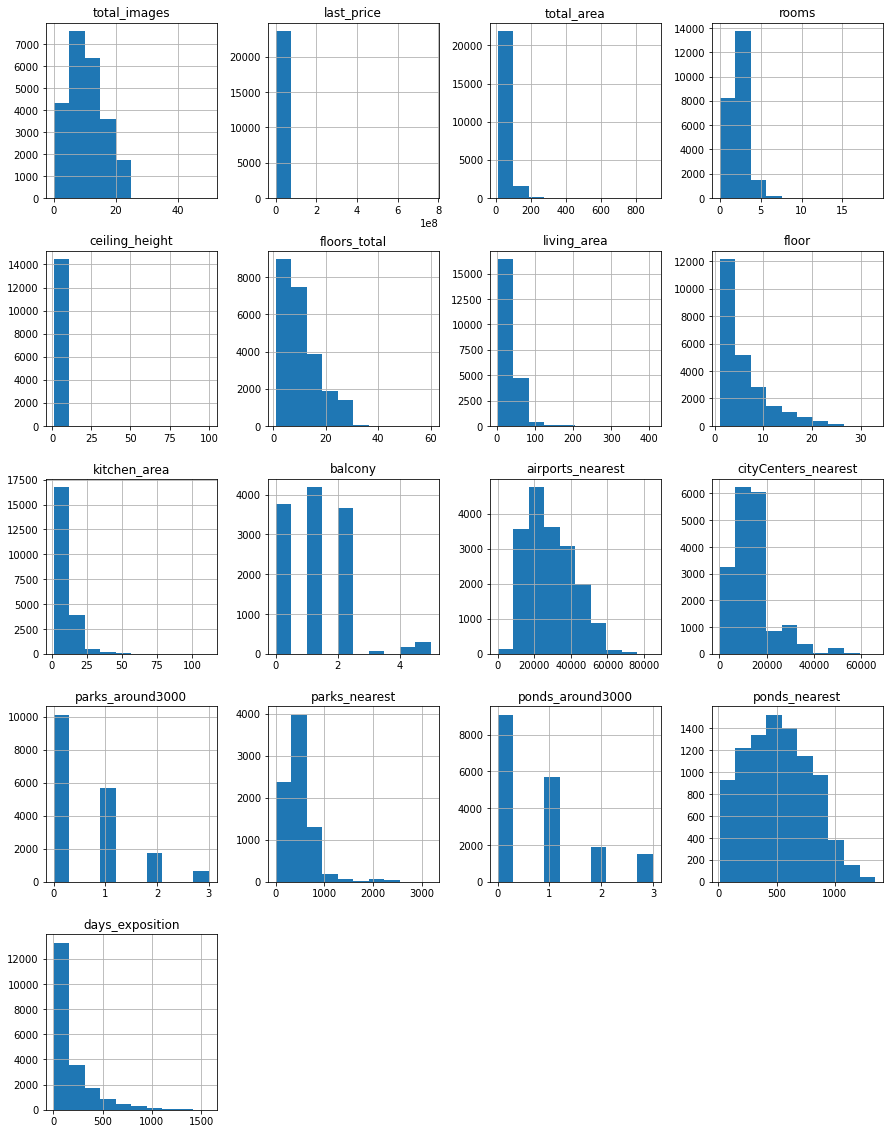

In [5]:
# изучить файл: гистограммы
data.hist(figsize=(15, 20));

<b>ИТОГИ</b>
1. Импортирована библиотека pandas и открыт файл.
2. Изучен файл выводом первых 10 строк.
3. Изучен файл методом <i>info()</i>.
4. Построены гистограммы.

### <a class="anchor" name="second">Предобработка данных</a>

#### <a class="anchor" name="second-first">Пропущенные значения</a>

In [6]:
# вывести количество пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения в <code>ceiling_height</code>, <code>floors_total</code>, <code>living_area</code> можем заполнить медианными значениями, так как медиана является более устойчивым показателем к выбросам в данных.
Пропущенные значения в <code>balcony</code> и <code>days_exposition</code> заполнить нулевыми значениями.
Пропущенные значения в <code>is_apartment</code> заполнить False.

Остальные пропущенные значения мы не можем заполнить, так как недостаточно информации.  
<code>kitchen_area</code> - площадь кухни могли не указать, потому что это студия.  
<code>locality_name</code> - название населённого пункта. Мы не сможем заполнить самостоятельно. Причина пропуска непонятна.  
<code>airports_nearest</code> - расстояние до ближайшего аэропорта. Мы не сможем заполнить самостоятельно. Причина пропуска непонятна.  
<code>cityCenters_nearest</code> - расстояние до центра города. Мы не сможем заполнить самостоятельно. Причина пропуска непонятна.  
<code>parks_around3000</code> - число парков в радиусе 3 км. Мы не сможем заполнить самостоятельно. Причина пропуска непонятна.  
<code>parks_nearest</code> - расстояние до ближайшего парка. Мы не сможем заполнить самостоятельно. Причина пропуска непонятна.  
<code>ponds_around3000</code> - число водоёмов в радиусе 3 км. Мы не сможем заполнить самостоятельно. Причина пропуска непонятна.  
<code>ponds_nearest</code> - расстояние до ближайшего водоёма. Мы не сможем заполнить самостоятельно. Причина пропуска непонятна.  

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

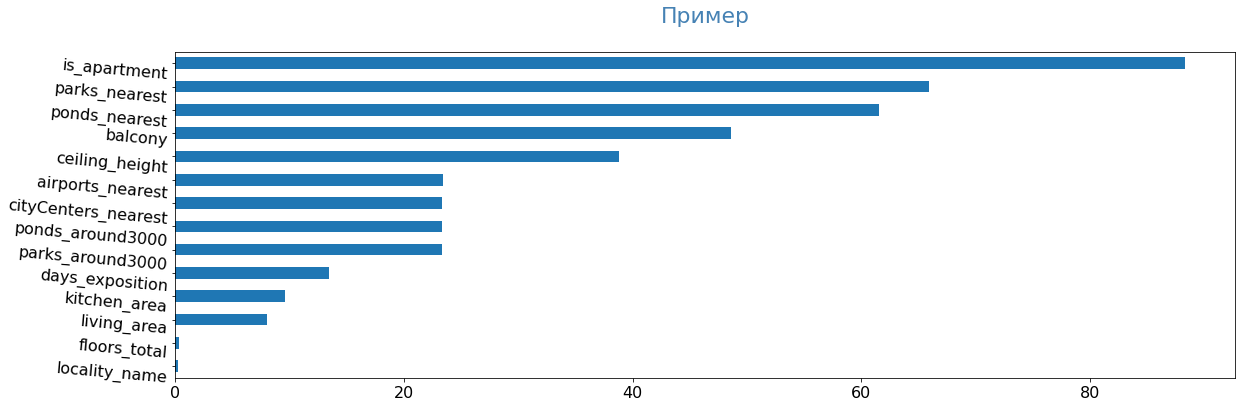

In [8]:
pass_value_barh(data)

In [9]:
# check
data.isna()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
23695,False,False,False,False,False,True,False,False,False,True,...,False,True,False,True,True,True,True,True,True,False
23696,False,False,False,False,False,True,False,False,False,True,...,True,True,False,True,True,True,True,True,True,True
23697,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# заполнить пропуски в ceiling_height медианными значениями
# причина пропусков: причина непонятна
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace = True) 

# заполнить пропуски в floors_total медианными значениями
# причина пропусков: причина непонятна
data['floors_total'].fillna(data['floors_total'].median(), inplace = True) 

# заполнить пропуски в living_area медианными значениями
# причина пропусков: причина непонятна
data['living_area'].fillna(data['living_area'].median(), inplace = True)

# заполнить пропуски в kitchen_area медианными значениями
# причина пропусков: причина непонятна
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace = True) 

# заполнить пропуски в balcony нулевыми значениями
# причина пропусков: возможно, не указали количество балконов, так как их нет
data['balcony'] = data['balcony'].fillna(0)

# заполнить пропуски значениями False
# причина пропусков: возможно, указание "апартаменты" появилось позже
data['is_apartment'] = data['is_apartment'].fillna(False)

# заполнить пропуски days_exposition нулевыми значениями
# причина пропусков: причина непонятна
data['days_exposition'] = data['days_exposition'].fillna(0)

#### check nan

In [11]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [12]:
# оставить строки, где общая площадь больше (жилая_площадь + площадь_кухни)
data = data[data['total_area']*0.9 >= (data['living_area'] + data['kitchen_area'])]

# проверить, что общая площадь не меньше жилая_площадь + площадь_кухни
# false - нет строк, где total_area меньше
# true - есть строки, где total_area меньше
print((data['total_area']*0.9 < (data['living_area'] + data['kitchen_area'])).unique())

[False]


In [13]:
# check
data.shape[0]

22252

In [14]:
# оставить строки, где этаж квартиры меньше количества этажей в доме иои равен ему
data = data[data['floors_total'] >= data['floor']]

# проверить, что этаж квартиры не больше количества этажей в доме иои равен ему
# false - нет строк, где этаж квартиры больше количества этаже в доме
# true - есть строки, где этаж квартиры больше количества этаже в доме
print((data['floors_total'] < data['floor']).unique())

[False]


#### check area

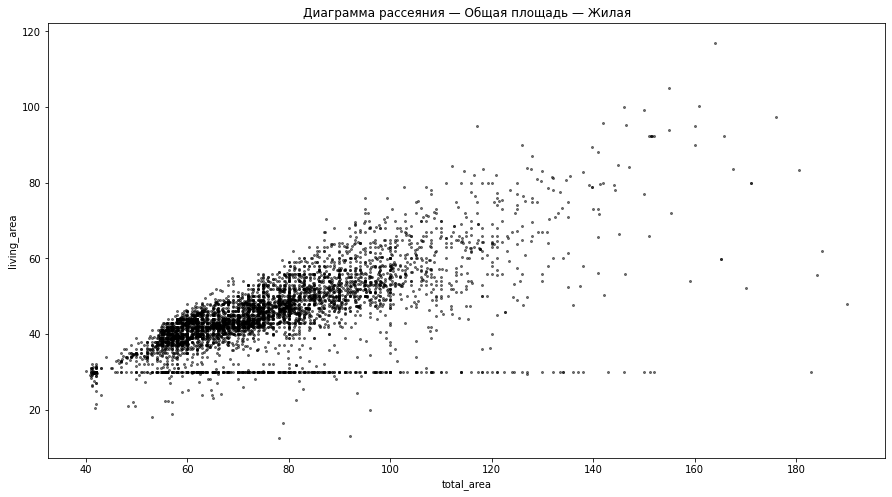

In [15]:
# check

data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [16]:
# проверить, количество пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              46
airports_nearest         5029
cityCenters_nearest      5006
parks_around3000         5005
parks_nearest           14521
ponds_around3000         5005
ponds_nearest           13628
days_exposition             0
dtype: int64

#### <a class="anchor" name="second-second">Тип данных</a>

In [17]:
# изменить тип данных first_day_exposition на datetime, так как это дата
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

# изменить тип данных days_exposition на int, так как количество дней - целое число
#data['days_exposition'] = data['days_exposition'].astype('int')

# изменить тип данных balcony на int, так как количество балконов - целое число
#data['balcony'] = data['balcony'].astype('int')

# изменить тип данных last_price на int, так как стоимость - целое число
#data['last_price'] = data['last_price'].astype('int')

columns_for_changing_types = ['days_exposition', 'balcony', 'last_price', 'floors_total']

# цикл для изменения типов данных
for item in columns_for_changing_types:
    data[columns_for_changing_types] = data[columns_for_changing_types].astype('int')

In [18]:
# проверить, что типы данных успешно изменены
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22220 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22220 non-null  int64         
 1   last_price            22220 non-null  int64         
 2   total_area            22220 non-null  float64       
 3   first_day_exposition  22220 non-null  datetime64[ns]
 4   rooms                 22220 non-null  int64         
 5   ceiling_height        22220 non-null  float64       
 6   floors_total          22220 non-null  int64         
 7   living_area           22220 non-null  float64       
 8   floor                 22220 non-null  int64         
 9   is_apartment          22220 non-null  bool          
 10  studio                22220 non-null  bool          
 11  open_plan             22220 non-null  bool          
 12  kitchen_area          22220 non-null  float64       
 13  balcony         

#### <a class="anchor" name="second-third">Уникальные значения. Работа с дубликатами</a>

In [19]:
# получить набор всех уникальных значений в столбце locality_name
print('Количество уникальных значени:', data['locality_name'].nunique())
print()
print(data['locality_name'].unique())

Количество уникальных значени: 355

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок Плодовое' 'деревня Заклинье'
 'поселок Торковичи' 'поселок Первомайское' 'Красное Село'
 'посёлок Понтонный' 'Сясьстрой' 'деревня Старая' 'деревня Лесколово'
 'посёлок Новый Свет' 'село Путилово' 'Ивангород' 'Мурино' 'Сланцы'
 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня 

Необходимо: 
1. привести все слова к нижнему регистру
2. заменить ё на е
3. заменить "городской поселок" на "поселок городского типа"

In [20]:
# привести все слова к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
print('Количество уникальных значени:', data['locality_name'].nunique())

Количество уникальных значени: 355


In [21]:
# заменить ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print('Количество уникальных значени:', data['locality_name'].nunique())

Количество уникальных значени: 321


In [22]:
# заменить городской поселок на поселок городского типа
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
print('Количество уникальных значени:', data['locality_name'].nunique())

Количество уникальных значени: 314


In [23]:
# задание: «поселок Рябово» и «поселок городского типа Рябово», 
# заменить обозначения одних и тех же населённых пунктов
data['locality_name'] = data['locality_name'].str.replace('поселок рябово','поселок городского типа рябово')
print('Количество уникальных значени:', data['locality_name'].nunique())

Количество уникальных значени: 313


In [24]:
# check
data.locality_name.nunique()

313

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />хорошая работа по избавлению от неявных дубликатов

In [25]:
# проверить количество явных дубликатов
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Проверка на поиск дубликатов выполнена, молодец
        
Особенно это станет важным, когда мы перейдем к более сложным задачам на втором модуле курса
          

#### <a class="anchor" name="second-fourth">Аномальные значения</a>

In [26]:
# изучить значения, посмотреть минимальные и максимальные
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22220.000000,2.222000e+04,22220.000000,22220.000000,22220.000000,22220.000000,22220.000000,22220.000000,22220.000000,22220.000000,17191.000000,17214.000000,17215.000000,7699.000000,17215.000000,8592.000000,22220.000000
mean,9.952925,6.642439e+06,61.382447,2.113591,2.718453,10.564176,34.095761,5.821827,10.375235,0.600675,28852.492700,14230.683223,0.613535,489.737109,0.769271,518.721485,159.004185
std,5.683155,1.105031e+07,35.756354,1.065886,0.729279,6.503028,21.051522,4.800224,5.479582,0.965674,12635.736589,8670.098675,0.800685,340.737257,0.939977,277.584968,215.489470
min,0.000000,1.219000e+04,18.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.500000e+06,41.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.200000,0.000000,18610.500000,9234.000000,0.000000,288.000000,0.000000,295.000000,22.000000
50%,10.000000,4.700000e+06,53.010000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26784.000000,13095.000000,0.000000,454.000000,0.000000,503.000000,76.000000
75%,14.000000,6.892250e+06,70.300000,3.000000,2.700000,15.000000,41.600000,8.000000,11.500000,1.000000,37313.000000,16293.000000,1.000000,611.000000,1.000000,730.000000,202.000000
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Со значениями в <code>total_images</code> всё хорошо: число фотографий квартиры в объявлении от 0 до 50.  

Значения в <code>last_price</code> варьируются от 12 100 (e+04 = 10000) до 763 000 000 (e+08 = 100000000). Такая дорогая стоимость на квартиры кажется аномалией.

In [27]:
# определить, сколько квартир в разных ценовых категориях
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью до 100 000:', data.query('last_price <= 1e+05')['last_price'].count())
print('Квартир стоимостью от 100 000 до 1 000 000:', data.query('1e+05 < last_price <= 1e+06')['last_price'].count())
print('Квартир стоимостью от 1 000 000 до 10 000 000:', data.query('1e+06 < last_price <= 1e+07')['last_price'].count())
print('Квартир стоимостью от 10 000 000 до 100 000 000:', data.query('1e+07 < last_price <= 1e+08')['last_price'].count())
print('Квартир стоимостью выше 100 000 000:', data.query('last_price > 1e+08')['last_price'].count())

Квартир стоимостью 0: 0
Квартир стоимостью до 100 000: 1
Квартир стоимостью от 100 000 до 1 000 000: 200
Квартир стоимостью от 1 000 000 до 10 000 000: 19405
Квартир стоимостью от 10 000 000 до 100 000 000: 2579
Квартир стоимостью выше 100 000 000: 35


В <code>last_price</code>, как и говорилось, есть квартира стоимостью до 100 000, а также есть квартиры, стоимостью больше 100 000 000. Эти значения не будем учитывать.

In [28]:
# удалить данные о квартирах, стоимость которых меньше 100 000 и больше 100 000 000
data.drop(index=data.query('last_price < 1e+05').index,inplace=True)
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

Значения в <code>total_area</code> варьируются от 12 до 900. Эти значения выглядят странно, так как в данных есть студии (небольшая площадь), а также дорогие квартиры (в которых площадь может быть довольно большой).

In [29]:
# определить, сколько квартир с разной площадью
print('Квартир с площадью до 20:', data.query('total_area <= 20')['total_area'].count())
print('Квартир c площадью от 20 до 200:', data.query('20 < total_area <= 200')['total_area'].count())
print('Квартир с площадью от 200 до 500:', data.query('200 < total_area <= 500')['total_area'].count())
print('Квартир с площадью больше 500:', data.query('total_area > 500')['total_area'].count())

Квартир с площадью до 20: 3
Квартир c площадью от 20 до 200: 21995
Квартир с площадью от 200 до 500: 183
Квартир с площадью больше 500: 3


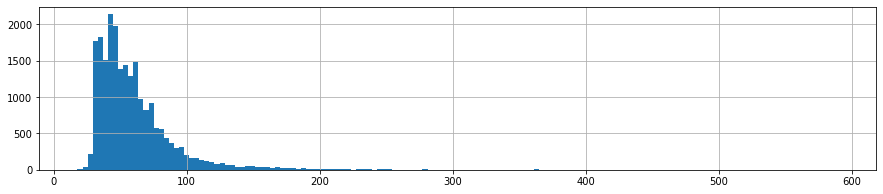

In [30]:
data.total_area.hist(bins = 150, figsize = (15,3));

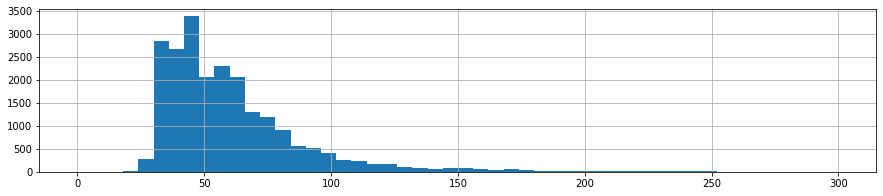

In [31]:
data.total_area.hist(bins = 50, figsize = (15,3), range = (0, 300));

Видим, что все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями, их можно удалить.

In [32]:
# удалить данные о квартирах, общая площадь которых меньше 20 и больше 250 кв.м.
data.drop(index=data.query('total_area < 20').index,inplace=True)
data.drop(index=data.query('total_area > 250').index,inplace=True)

Значения в <code>rooms</code> варьируются от 0 до 19. Выглядит подозрительным, что количество комнат в квартире может быть 0 и 19. Но у нас есть студии (<code>studio</code>), апартаменты (<code>is_apartment</code>), квартиры со свободной планировкой (<code>open_plan</code>) и дорогие квартиры.

In [33]:
# определить, сколько квартир с разным количеством комнат
print('Квартир с количеством комнат 0:', data.query('rooms == 0')['rooms'].count())
print('Квартир с количеством комнат от 10 до 20:', data.query('10 < rooms <= 20')['rooms'].count())

Квартир с количеством комнат 0: 29
Квартир с количеством комнат от 10 до 20: 3


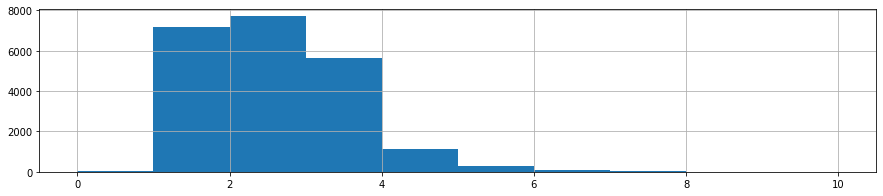

In [34]:
data.rooms.hist(bins = 10, figsize = (15,3), range = (0, 10));

Построив гистограмму, видим, что квартиры, где количество комнат больше 6, являются редкостью, их можно удалить.

In [35]:
# удалить строчки с квартирами, в которых больше 6 комнат
data.drop(index=data.query('rooms > 6').index,inplace=True)

In [36]:
# проверить, что студий столько же, сколько и квартир с количеством комнат 0
print('Количество студий:', data.query('rooms == 0 and studio')['rooms'].count())
print('Количество апартаментов:', data.query('rooms == 0 and is_apartment')['rooms'].count())
print('Количество квартир со свободной планировкой:', data.query('rooms == 0 and open_plan')['rooms'].count())

Количество студий: 22
Количество апартаментов: 0
Количество квартир со свободной планировкой: 7


Видим, что есть студии и квартиры со свободной планировкой, в которых указано 0 комнат.

Значения в <code>ceiling_height</code> варьируются от 1 до 32. Выглядит подозрительным, потому что кажется нереальным, что высота потолков может быть 1 метр и 32 метра.

In [37]:
# определить, сколько квартир с разной высотой потолков
print('Количество квартир с высотой потолков от 4 до 5 метров: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()))
print('Количество квартир с высотой потолков от 5 до 25 метров: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()))
print('Количество квартир с высотой потолков от 25 до 35 метров: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 35')['ceiling_height'].count()))
print('Количество квартир с высотой потолков больше 35 метров: ' + str(data.query('ceiling_height > 35')['ceiling_height'].count()))

Количество квартир с высотой потолков от 4 до 5 метров: 29
Количество квартир с высотой потолков от 5 до 25 метров: 11
Количество квартир с высотой потолков от 25 до 35 метров: 16
Количество квартир с высотой потолков больше 35 метров: 0


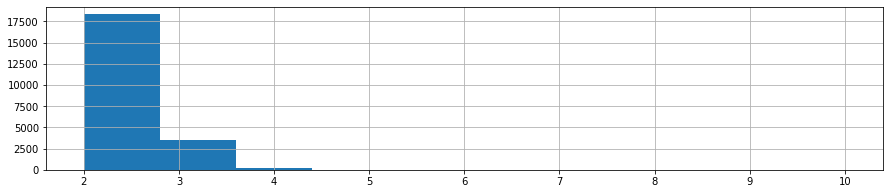

In [38]:
data.ceiling_height.hist(bins = 10, figsize = (15,3), range = (2, 10));

Можно предположить, что значения в <code>ceiling_height</code> от 25 до 35 на самом деле являются вещественными (от 2,5 метров до 3,5 метров. То есть эти значения нужно разделить на десять.  
  
Квартир с высотой потолков от 4 до 5 метров не должно быть, так как это слишком высокие потолки. Для двухэтажных квартир такая высота является маленькой. Удаляем строки с такой высотой потолков.  

In [39]:
# удалить строки, где высота потолков от 4 до 25 метров
data.drop(index=data.query('4 <= ceiling_height < 25').index,inplace=True)

# поделить значения на 10, где высота потолков от 25 до 35
#for height in data['ceiling_height']:
    #if 25 <= height <= 35:
        #height = height / 10
        
# поделить значения на 10, где высота потолков от 25 до 35
data.loc[(data.ceiling_height >= 25) & (data.ceiling_height <= 35), 'ceiling_height'] = data.ceiling_height / 10

# удалить строки, где высота потолков от 35 метров
data.drop(index=data.query('ceiling_height > 35').index,inplace=True)

Мы рассмотрели в <code>ceiling_height</code> значения от 4 метров и больше. У нас есть квартиры с высотой потолков до 4 метров. Сразу точно можно сказать, что квартиры с высотой потолков до 2,5 метров необходимо удалить.

In [40]:
# определить, сколько квартир с разной высотой потолков
print('Количество квартир с высотой потолков до 2,5 метров: ' + str(data.query('ceiling_height < 2.5')['ceiling_height'].count()))
print('Количество квартир с высотой потолков от 2,5 до 3 метров: ' + str(data.query('2.5 <= ceiling_height < 3')['ceiling_height'].count()))
print('Количество квартир с высотой потолков от 3 до 4 метров: ' + str(data.query('3 <= ceiling_height <= 4')['ceiling_height'].count()))

Количество квартир с высотой потолков до 2,5 метров: 63
Количество квартир с высотой потолков от 2,5 до 3 метров: 19590
Количество квартир с высотой потолков от 3 до 4 метров: 2319


In [41]:
# удалить строки, где высота потолков до 2,5 метров
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

Значения в <code>floors_total</code> варьируются от 1 до 60. Это не выглядит подозрительным, так как квартиры на самом деле могут находиться и в одноэтажных, и в 60-этажных домах, но проверим, построив гистограммы.

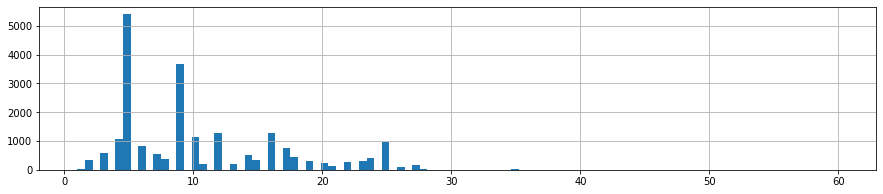

In [42]:
data.floors_total.hist(bins = 100, figsize = (15,3));

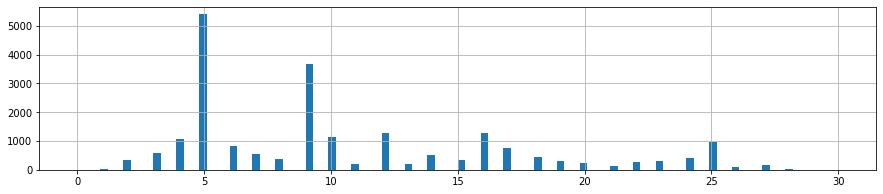

In [43]:
data.floors_total.hist(bins = 100, figsize = (15,3), range = (0, 30));

Видим, что все объявления в домах с этажностью больше 25 можно считать редкостями, их можно удалить.

In [44]:
# удалить данные об объявлениях, этажность домов которых больше 25
data.drop(index=data.query('floors_total > 25').index,inplace=True)

Значения в <code>living_area</code> варьируются от 2 до 409. Выглядит подозрительным. Подозрения вызывает квартира с жилой площадью в 2 кв.м. А также подозрения вызывают квартиры с жилой площадью больше 300 кв.м.

In [45]:
# определить, сколько квартир с разной жилой площадью
print('Количество квартир с жилой площадью до 10 кв.м.: ' + str(data.query('living_area < 10')['living_area'].count()))
print('Количество квартир с жилой площадью от 10 до 100 кв.м.: ' + str(data.query('10 <= living_area < 100')['living_area'].count()))
print('Количество квартир с жилой площадью от 100 до 300 кв.м.: ' + str(data.query('100 <= living_area <= 300')['living_area'].count()))
print('Количество квартир с жилой площадью больше 300 кв.м.: ' + str(data.query('living_area > 300')['living_area'].count()))

Количество квартир с жилой площадью до 10 кв.м.: 22
Количество квартир с жилой площадью от 10 до 100 кв.м.: 21388
Количество квартир с жилой площадью от 100 до 300 кв.м.: 188
Количество квартир с жилой площадью больше 300 кв.м.: 0


In [46]:
# удалить строки, где жилая площадь меньше 10 кв.м.
data.drop(index=data.query('living_area < 10').index,inplace=True)

# удалить строки, где жилая площадь больше 300 кв.м.
data.drop(index=data.query('living_area > 300').index,inplace=True)

Значения в <code>floor</code> варьируются от 1 до 33. Ничего подозрительного нет: квартиры находят на этажах с 1 по 33.

Значения в <code>kitchen_area</code> варьируются от 1,3 до 112. Маленькие кухни могут быть, так как у нас есть квартиры со свободной планировкой, но они точно должны быть больше 1,3. Большие кухни тоже могут встречаться, учитывая, что есть дорогие квартиры с площадью больше 300 кв.м.

In [47]:
# удалить строки, где площадь кухни меньше 5 кв.м.
data.drop(index=data.query('kitchen_area < 5').index,inplace=True)

Значения в <code>balcony</code> варьируются от 0 до 5. Ничего подозрительного нет.

Значения в <code>airports_nearest</code> варьируются от 0 до 84869. Подозрительно, что есть квартиры, расстояние от которых до аэропорта 0 метров.

In [48]:
# определить, сколько квартир с разным расстоянием до аэропорта
print('Количество квартир с расстоянием до аэропорта 0 метров: ' + str(data.query('airports_nearest == 0')['airports_nearest'].count()))
print('Количество квартир с расстоянием до аэропорта от 10 до 1000 м.: ' + str(data.query('10 <= airports_nearest < 1000')['airports_nearest'].count()))
print('Количество квартир с расстоянием до аэропорта от 1000 до 10 000 м.: ' + str(data.query('1000 <= airports_nearest <= 10000')['airports_nearest'].count()))
print('Количество квартир с расстоянием до аэропорта больше 10 000 м.: ' + str(data.query('airports_nearest > 10000')['airports_nearest'].count()))

Количество квартир с расстоянием до аэропорта 0 метров: 1
Количество квартир с расстоянием до аэропорта от 10 до 1000 м.: 0
Количество квартир с расстоянием до аэропорта от 1000 до 10 000 м.: 275
Количество квартир с расстоянием до аэропорта больше 10 000 м.: 16330


Удаляем в <code>airports_nearest</code> строки, где расстояние до аэропорта всего 0 метров.

In [49]:
# удалить строки, где расстояние до аэропорта 0 метров (или до 1000 метров)
data.drop(index=data.query('airports_nearest < 1000').index,inplace=True)

Значения в <code>cityCenters_nearest</code> варьируются от 181 до 65968. Выглядит подозрительным, что до центра города может быть больше 40 км (4000 метров).

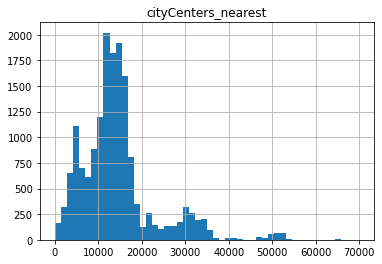

In [50]:
# построить гистограмму (х=расстояние в метрах до центра города, у=количество квартир)
data.hist('cityCenters_nearest', bins=50, range=(0,70000));

In [51]:
# удалить строки, где расстояние до центра города больше 40 000
data.drop(index=data.query('cityCenters_nearest > 40000').index,inplace=True)

Значения в <code>parks_around3000</code> варьируются от 0 до 3. Ничего не вызывает подозрений.

Значения в <code>parks_nearest</code> варьируются от 1 до 3190. Выглядит подозрительным, что есть квартиры, от которых до ближажайшего парка всего 1 метр.

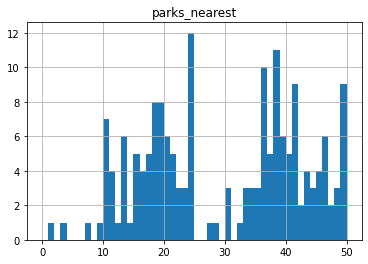

In [52]:
# построить гистограмму (х=расстояние в метрах до парка, у=количество квартир)
data.hist('parks_nearest', bins=50, range=(0,50));

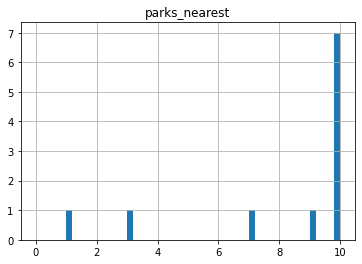

In [53]:
# построить гистограмму (х=расстояние в метрах до парка, у=количество квартир)
data.hist('parks_nearest', bins=50, range=(0,10));

In [54]:
# удалить строки, где расстояние до ближайшего парка меньше 10
data.drop(index=data.query('parks_nearest < 10').index,inplace=True)

Значения в <code>ponds_around3000</code> варьируются от 0 до 3. Ничего не вызывает подозрений.

Значения в <code>ponds_nearest</code> варьируются от 13 до 1344. Ничего не вызывает подозрений.

Значения в <code>days_exposition</code> варьируются от 0 до 1580. Вызывает подозрение, что самому старому объявлению больше 4 лет.

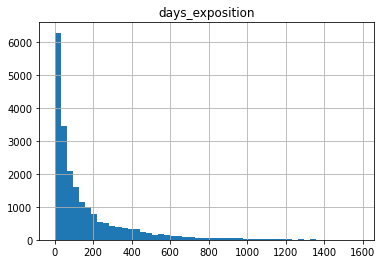

In [55]:
# построить гистограмму (х=количество дней, у=количество квартир)
data.hist('days_exposition', bins=50, range=(0,1580));

Построив гистограмму, видим, что выборка имеет длинный правый хвост, поэтому будем ориентироваться на ориентироваться на значения 0,99 квантиля, это где-то 1200 дней.

In [56]:
# check
data.shape[0]

21204

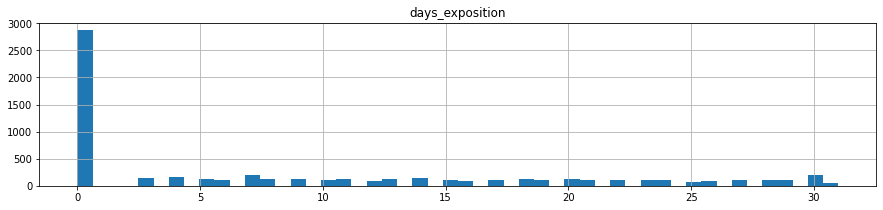

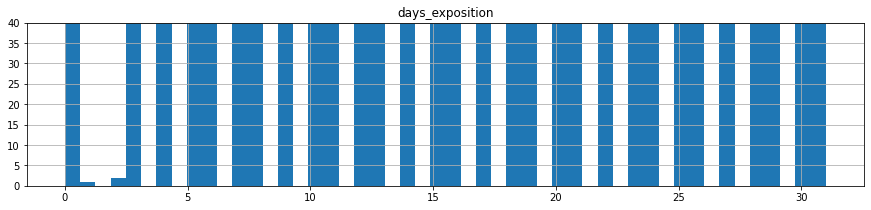

In [57]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,31));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,31))
plt.ylim(0, 40);

In [58]:
# удалить строки, в которых с момента публикации прошло больше 1200 дней и меньше 30
data = data.query('days_exposition < 1200')

In [59]:
# check
data.shape[0]

21117

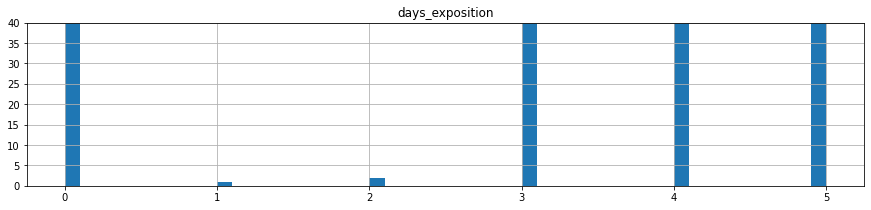

In [135]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [136]:
# check
data.drop(data.query('1 <= days_exposition <= 2').index, inplace=True)

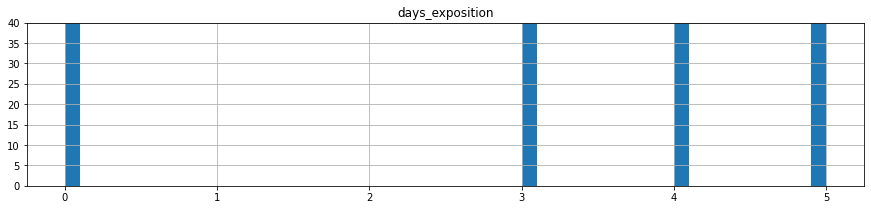

In [137]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [138]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21114 entries, 0 to 21116
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21114 non-null  int64         
 1   last_price              21114 non-null  int64         
 2   total_area              21114 non-null  float64       
 3   first_day_exposition    21114 non-null  datetime64[ns]
 4   rooms                   21114 non-null  int64         
 5   ceiling_height          21114 non-null  float64       
 6   floors_total            21114 non-null  int64         
 7   living_area             21114 non-null  float64       
 8   floor                   21114 non-null  int64         
 9   is_apartment            21114 non-null  bool          
 10  studio                  21114 non-null  bool          
 11  open_plan               21114 non-null  bool          
 12  kitchen_area            21114 non-null  float6

In [60]:
data.reset_index(drop=True,inplace=True)

<b>ИТОГИ</b>
1. <b>Восстановлены пропуски значений.</b>  
Пропуски в <code>ceiling_height</code>, <code>floors_total</code>, <code>living_area</code>, <code>kitchen_area</code> заполнены медианными значениями. В <code>balcony</code> и <code>days_exposition</code> пропуски заполнены нулевыми значениями. В <code>is_apartment</code> пропуски заполнены значениями False.  
  
2. <b>Изменены типы данных</b>  
Тип данных в <code>first_day_exposition</code> изменён на datetime, так как это дата. Тип данных в <code>days_exposition</code> изменён на int, так как количество дней - целое число. Тип данных <code>balcony</code> изменён на int, так как количество балконов - целое число. Тип данных <code>last_price</code> изменён на int, так как стоимость - целое число. Тип данных <code>floors_total</code> изменён на int, так как количество этажей - целое число.
  
3. <b>Проведена работа с дубликатами</b>  
В <code>locality_name</code> все значения приведены к нижнему регистру, была проведена замена ё на е, заменено "городской поселок" на "поселок городского типа".  
  
4. <b>Проведена работа с аномальными значениями</b>  
В <code>total_area</code> удалены квартиры, площадь которых меньше 20 и больше 250 кв.м., так как они довольно редкие. В <code>rooms</code> удалены квартиры, в которых больше 6 комнат, так как это встречается довольно редко. В <code>last_price</code> удалены квартиры стоимостью до 100 000 и больше 100 000 000. В <code>floors_total</code> удалены квартиры, которые находятся в домах, где больше 25 этажей, так как такие объявления можно считать редкостью. Значения в <code>ceiling_height</code> от 25 до 35 изменили на вещественные (от 2,5 метров до 3,5 метров), то есть эти значения разделили на десять. Значения от 4 до 25 и больше 35 удалили. Значения в <code>living_area</code> меньше 10 и больше 300 удалили. Значения в <code>kitchen_area</code> меньше 5 удалили. Удалили в <code>airports_nearest</code> строки, где расстояние до аэропорта всего 0 метров. Значения в <code>cityCenters_nearest</code> больше 40 000 удалили. Значения в <code>parks_nearest</code>, которые меньше 10, удалили. В <code>days_exposition</code> удалили значения, больше 1200. Обновили индексацию.

#### check gap

In [61]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21117 entries, 0 to 21116
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21117 non-null  int64         
 1   last_price            21117 non-null  int64         
 2   total_area            21117 non-null  float64       
 3   first_day_exposition  21117 non-null  datetime64[ns]
 4   rooms                 21117 non-null  int64         
 5   ceiling_height        21117 non-null  float64       
 6   floors_total          21117 non-null  int64         
 7   living_area           21117 non-null  float64       
 8   floor                 21117 non-null  int64         
 9   is_apartment          21117 non-null  bool          
 10  studio                21117 non-null  bool          
 11  open_plan             21117 non-null  bool          
 12  kitchen_area          21117 non-null  float64       
 13  balcony         

In [62]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,117.00","21,117.00","21,117.00","21,117.00","21,117.00","21,117.00","21,117.00","21,117.00","21,117.00"
min,0.00,21.10,2.50,0.00,"430,000.00",10.00,5.00,1.00,1.00
max,6.00,250.00,3.98,"1,199.00","98,000,000.00",184.00,107.00,25.00,25.00
median,2.00,53.00,2.65,75.00,"4,700,000.00",30.00,9.10,4.00,9.00


In [63]:
# check
data.rooms.value_counts().to_frame()

,rooms
2,7386
1,6826
3,5450
4,1088
5,270
6,70
0,27


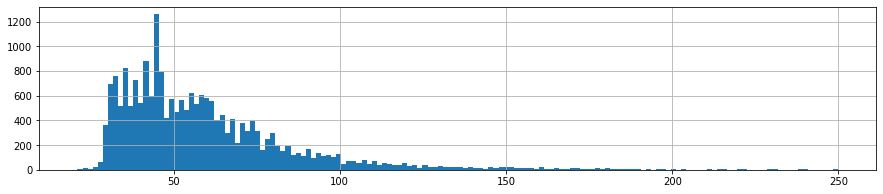

In [64]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

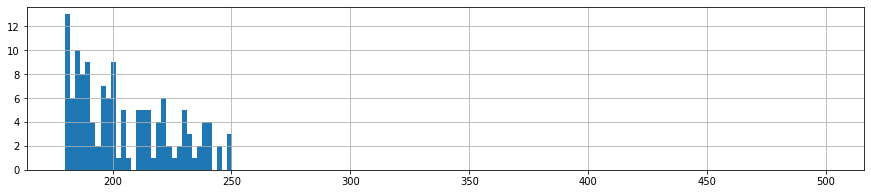

In [65]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

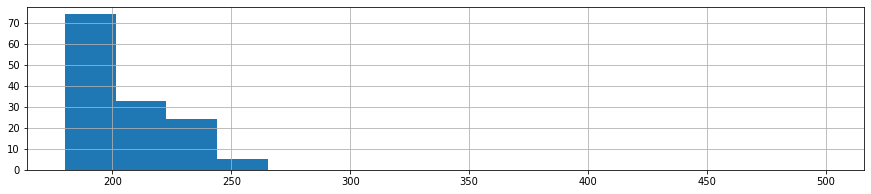

In [66]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

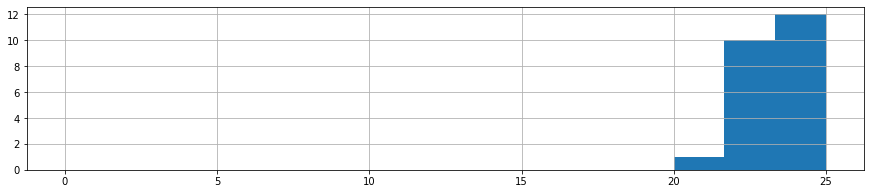

In [67]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [68]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,26.00,2.50,0.00,"600,000.00",10.00,5.00,1.00,2.00
0.01,1.00,29.30,2.50,0.00,"1,050,000.00",13.50,5.00,1.00,2.00
0.5,2.00,53.00,2.65,75.00,"4,700,000.00",30.00,9.10,4.00,9.00
0.99,5.00,167.44,3.50,962.84,"29,374,200.00",97.00,31.20,22.00,25.00
0.9988,6.00,226.98,3.80,"1,158.98","65,091,306.70",144.57,50.00,24.66,25.00


### <a class="anchor" name="third">Посчитайте и добавьте в таблицу новые столбцы</a>

#### <a class="anchor" name="third-first">Новый столбец: цена за 1 кв.м.</a>

In [69]:
# посчитать и добавить в таблицу цену за 1 кв.м.
data['price_per_1_sq_m'] = data['last_price'] / data['total_area']

#### <a class="anchor" name="third-second">Новый столбец: день публикации объявления</a>

In [70]:
# определеить и добавить в таблицу день публикации объявления
data['publication_day'] = data['first_day_exposition'].dt.dayofweek

#### <a class="anchor" name="third-third">Новый столбец: месяц публикации объявления</a>

In [71]:
# определеить и добавить в таблицу месяц публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month

#### <a class="anchor" name="third-fourth">Новый столбец: год публикации объявления</a>

In [72]:
# определеить и добавить в таблицу год публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year

#### <a class="anchor" name="third-fifth">Новый столбец: тип этажа квартиры</a>

In [73]:
# функция, которая проверяет и возвращает тип этажа
def categorize_floor(floor, floors_total):
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        pass

In [74]:
# новый столбец с типом этажа квартиры
data['floor_type'] = data.apply(lambda x: categorize_floor(x.floor, x.floors_total), axis=1)

#### <a class="anchor" name="third-sixth">Новый столбец: расстояние до центра города в км</a>

In [75]:
# определить и добавить новый столбец с расстоянием до центра города в км
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

# поменять тип данных с вещественного на целочисленное
data['cityCenters_nearest_km'] =  data['cityCenters_nearest_km'].astype('Int32')

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> данные добавлены корректно, молодец

<b>ИТОГИ</b>
1. Добавлени новый столбец <code>price_per_1_sq_m</code>, в котором посчитана цена за 1 кв.м. 
2. Добавлени новый столбец <code>publication_day</code>, в котором указан день публикации объявления. 
3. Добавлени новый столбец <code>publication_month</code>, в котором указан месяц публикации объявления.
4. Добавлени новый столбец <code>publication_year</code>, в котором указан год публикации объявления.
5. Добавлени новый столбец <code>floor_type</code>, в котором благодаря функции <code>categorize_floor</code> указан тип этажа.
6. Добавлени новый столбец <code>cityCenters_nearest_km</code>, в котором посчитано расстояние до центра города в км. 

### <a class="anchor" name="fourth">Проведите исследовательский анализ данных</a>

#### <a class="anchor" name="fourth-first">Изучаем параметры</a>

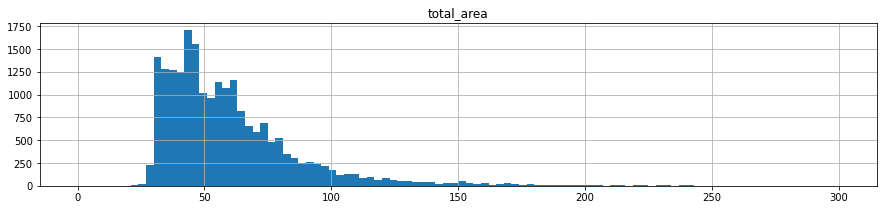

In [76]:
# построить гистограмму для общей площади
data.hist('total_area', bins=100, range=(0,300), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир с площадью до 50 кв.м., очень мало квартир с общей площадью больше 100 кв.м.

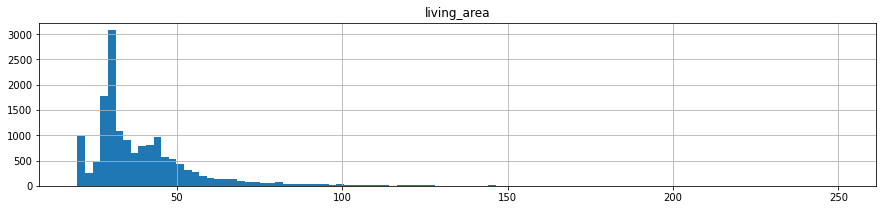

In [77]:
# построить гистограмму для жилой площади
data.hist('living_area', bins=100, range=(20,250), figsize = (15,3));

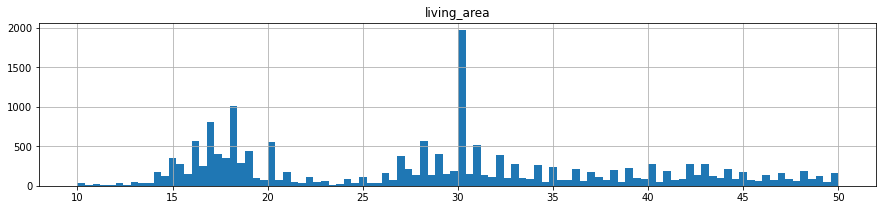

In [78]:
# построить гистограмму для жилой площади
data.hist('living_area', bins=100, range=(10,50), figsize = (15,3));

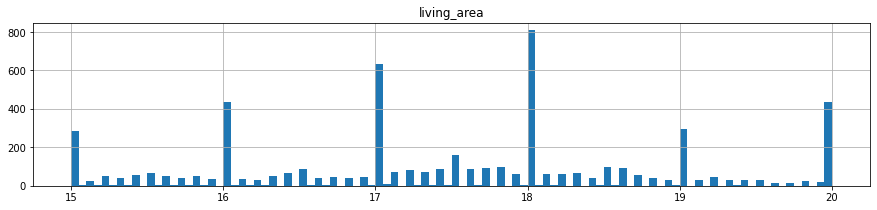

In [79]:
# построить гистограмму для жилой площади
data.hist('living_area', bins=100, range=(15,20), figsize = (15,3));

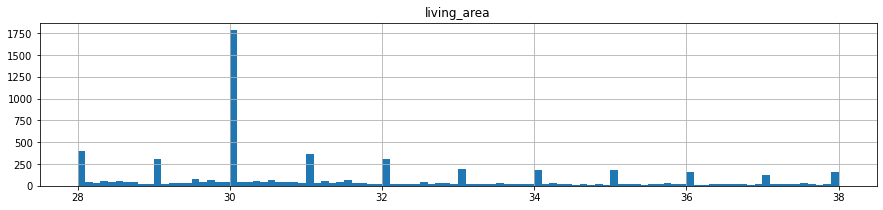

In [80]:
# построить гистограмму для жилой площади
data.hist('living_area', bins=100, range=(28,38), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир с жилой площадью 18 и 30 кв.м.

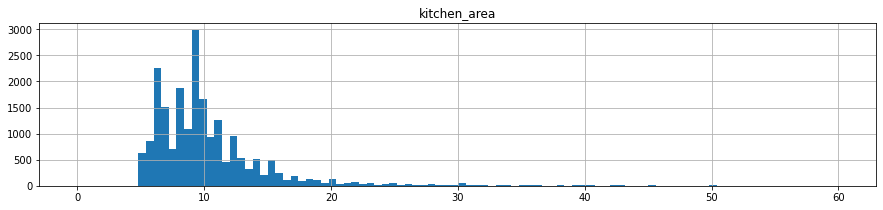

In [81]:
# построить гистограмму для площади кухни
data.hist('kitchen_area', bins=100, range=(0,60), figsize = (15,3));

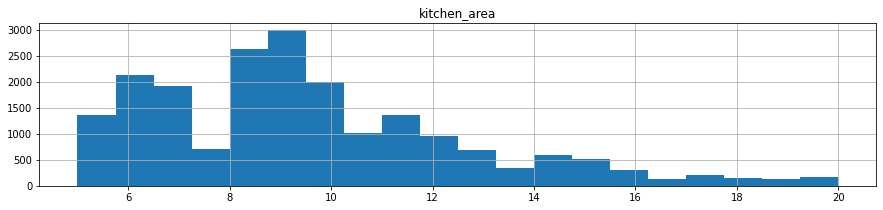

In [82]:
# построить гистограмму для площади кухни
data.hist('kitchen_area', bins=20, range=(5,20), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир с площадью кухни 9 кв.м.

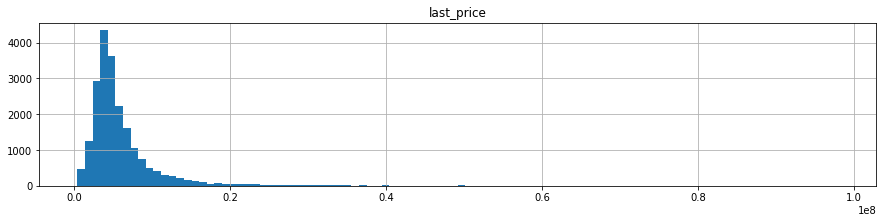

In [83]:
# построить гистограмму для цены объекта
data.hist('last_price', bins=100, figsize = (15,3));

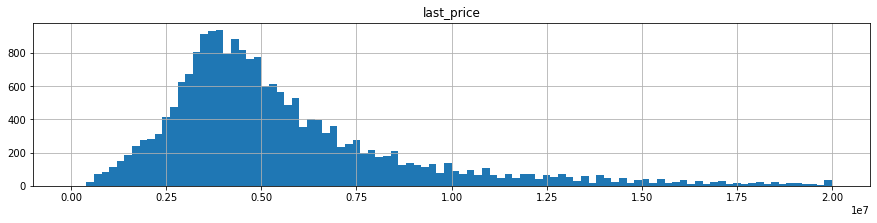

In [84]:
# построить гистограмму для цены объекта
data.hist('last_price', bins=100, range=(0,2e+07), figsize = (15,3));

<b>Описание:</b> Можно заметить, что распределение цены объектов нормальное, но справа хвост несколько длиннее. 

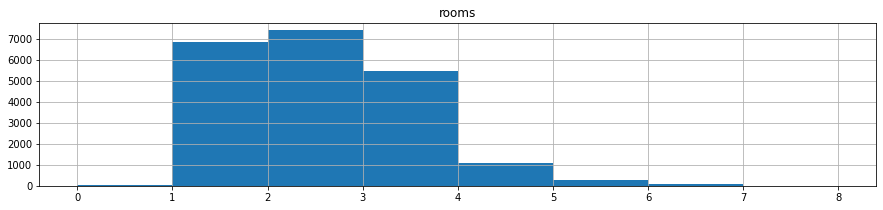

In [85]:
# построить гистограмму для количества комнат
data.hist('rooms', bins=8, range=(0, 8), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего однушек, двушек и трёшек.

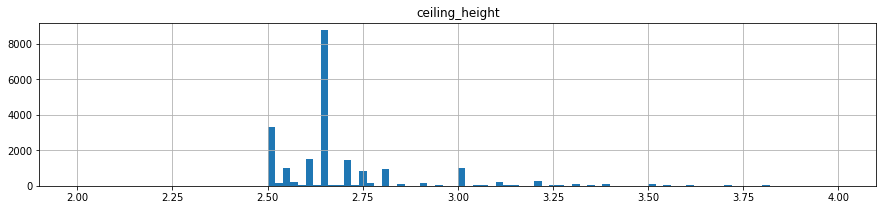

In [86]:
# построить гистограмму для высоты потолков
data.hist('ceiling_height', bins=100, range=(2, 4), figsize = (15,3));

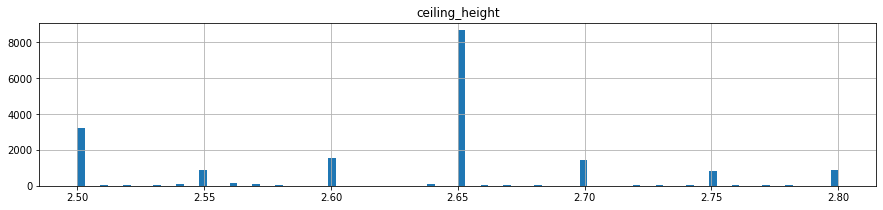

In [87]:
# построить гистограмму для высоты потолков
data.hist('ceiling_height', bins=100, range=(2.5, 2.8), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир с высотой потолков 2,65 метра.

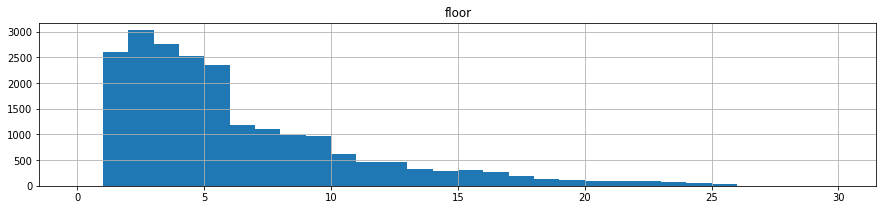

In [88]:
# построить гистограмму для этажа квартиры
data.hist('floor', bins=30, range=(0, 30), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир, которые находятся на 1-5 этажах.

In [89]:
print('Квартир с количеством комнат 0:', data['floor_type'].unique())

Квартир с количеством комнат 0: ['другой' 'первый' 'последний']


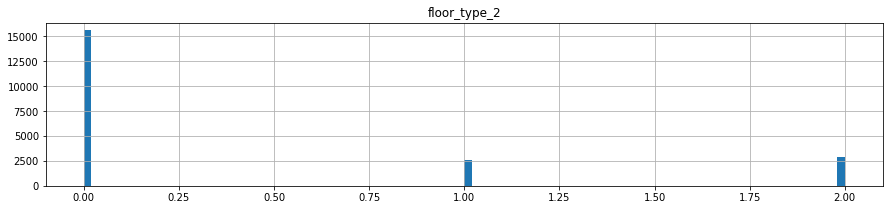

In [90]:
# функция для перевода "первый" в 1, "последний" в 2, "другой" в 0
def categorize_floor_2(floor, floors_total):
    try:
        if floor == 1:
            return 1
        elif floor == floors_total:
            return 2
        return 0
    except:
        pass

# применить функцию к столбцам floor и floors_tota, создавая новый столбец
data['floor_type_2'] = data.apply(lambda x: categorize_floor_2(x.floor, x.floors_total), axis=1)

# изменить тип данных в новом столбце на int
data['floor_type_2'] = data['floor_type_2'].astype('Int32')

# построить гистограмму для типа этажа квартиры
data.hist('floor_type_2', bins=100, range=(0, 2), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир находится не на первом и не на последнем этажах.

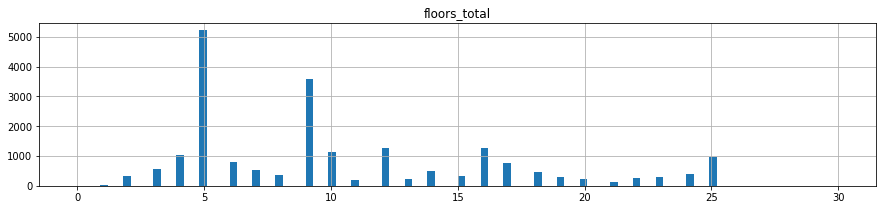

In [91]:
# построить гистограмму для общего числа этажей в доме
data.hist('floors_total', bins=100, range=(0,30), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир находится в пятиэтажных и девятиэтажных домах.

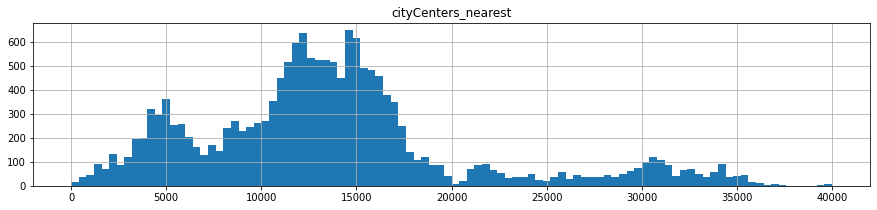

In [92]:
# построить гистограмму для расстояния до центра города
data.hist('cityCenters_nearest', bins=100, range=(0,40000), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир находится в 10-15 километрах от центра города.

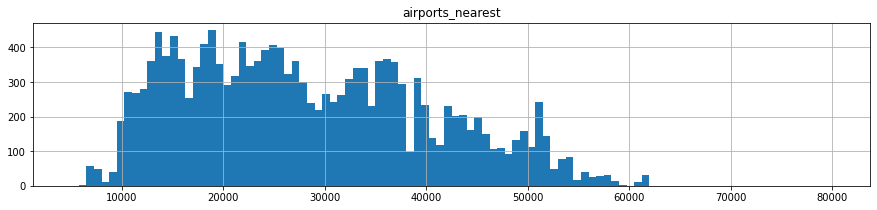

In [93]:
# построить гистограмму для расстояния до ближайшего аэропорта
data.hist('airports_nearest', bins=100, range=(5000,80000), figsize = (15,3));

<b>Описание:</b> Можно заметить, что на гистограмме нет особых всплесков. Примерно одинаково много квартир находится в 10 000 - 30 000 метрах от аэропорта.

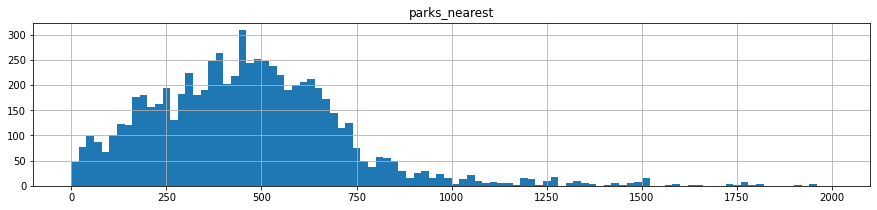

In [94]:
# построить гистограмму для расстояния до ближайшего парка
data.hist('parks_nearest', bins=100, range=(0,2000), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего квартир находится на расстоянии до 750 метров до ближайшего парка.

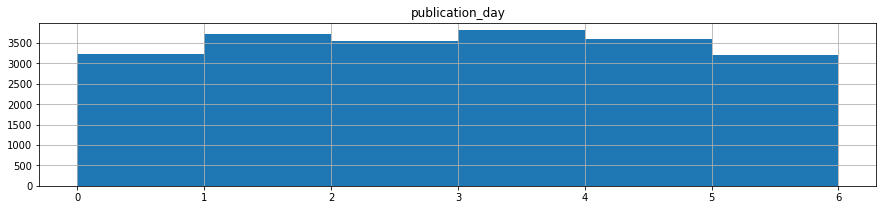

In [95]:
# построить гистограмму для дней публикации
data.hist('publication_day', bins=6, range=(0,6), figsize = (15,3));

<b>Описание:</b> Можно заметить, что объявления публикуются примерно в одинаковом количестве во все дни недели.

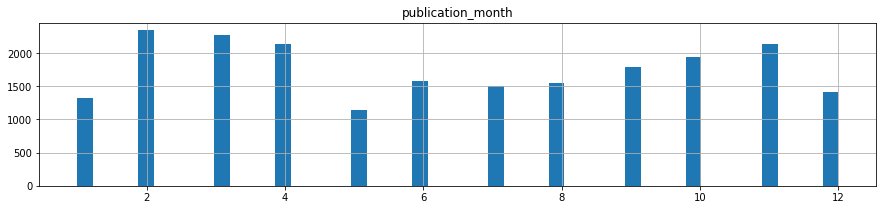

In [96]:
# построить гистограмму для месяцев публикации
data.hist('publication_month', bins=50, range=(1,12), figsize = (15,3));

<b>Описание:</b> Можно заметить, что больше всего объявлений было опубликовано в феврале.

#### <a class="anchor" name="fourth-second">Как быстро продавались квартиры (столбец days_exposition)</a>

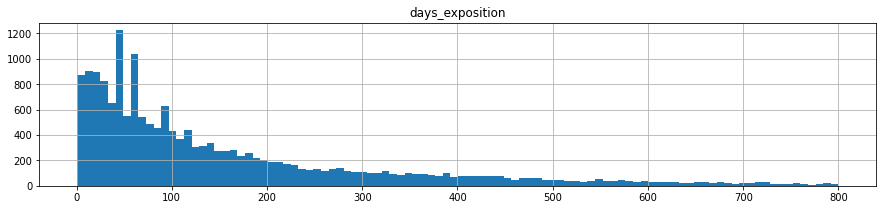

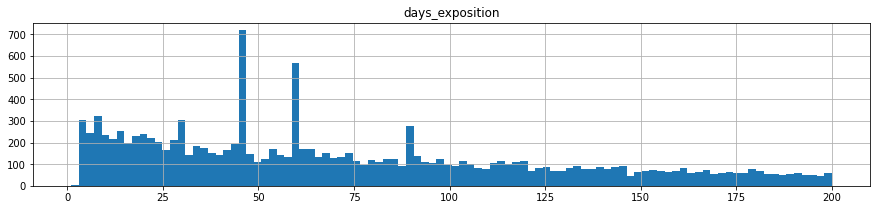

In [97]:
# построить гистограмму для количества дней с момента публикации объявления до продажи квартиры
data.hist('days_exposition', bins=100, range=(1,800), figsize = (15,3));
data.hist('days_exposition', bins=100, range=(1,200), figsize = (15,3));

In [98]:
# изучить моду
(
    data.groupby('days_exposition')
    .count()
    .sort_values(by='rooms', ascending=False)
    .head(10)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,price_per_1_sq_m,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km,floor_type_2
days_exposition,,,,,,,,,,,,,,,,,,,,,
0,2866,2866,2866,2866,2866,2866,2866,2866,2866,2866,...,1043,2071,1083,2866,2866,2866,2866,2866,2070,2866
45,639,639,639,639,639,639,639,639,639,639,...,114,303,138,639,639,639,639,639,303,639
60,479,479,479,479,479,479,479,479,479,479,...,171,417,212,479,479,479,479,479,417,479
7,199,199,199,199,199,199,199,199,199,199,...,52,157,68,199,199,199,199,199,157,199
30,194,194,194,194,194,194,194,194,194,194,...,64,176,83,194,194,194,194,194,176,194
90,184,184,184,184,184,184,184,184,184,184,...,102,170,104,184,184,184,184,184,170,184
4,160,160,160,160,160,160,160,160,160,160,...,62,129,61,160,160,160,160,160,129,160
3,145,145,145,145,145,145,145,145,145,145,...,46,119,44,145,145,145,145,145,119,145
14,136,136,136,136,136,136,136,136,136,136,...,51,120,58,136,136,136,136,136,120,136


Моды в 'days_exposition' = 45, 60 и 90 дней. Они равны срокам публикации на Яндекс.Недвижимость.

In [99]:
#посчитать среднее и медиану
print('Среднее days_exposition:', int(data['days_exposition'].mean()))
print('Медиана days_exposition:', int(data['days_exposition'].median()))

Среднее days_exposition: 153
Медиана days_exposition: 75


In [100]:
#посчитать 25 и 75 квантили
(
    data[['days_exposition']]
    .quantile([0.25, .5, .75])
    .style.format("{:,.2f}")
)

,days_exposition
0.25,22.00
0.5,75.00
0.75,199.00


<b>Вывод:</b> 
1. Среднее количество дней с момента публикации объявления до продажи составляет 146 дней.  
2. Медианное значение количества дней с момента публикации объявления до продажи составляет 114 дней.  
4. Быстрыми продажами можно считать те продажи, у которых с момента публикации не прошло 63 дня (25 квантиль). Долгими продажами можно считать те продажи, у которых с момента публикации прошло больше 204 дней (75 квантиль).

#### <a class="anchor" name="fourth-third">Какие факторы больше всего влияют на общую (полную) стоимость объекта</a>

Коэффициент корреляции =  0.7411907587101535


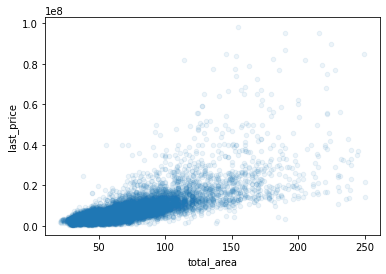

In [101]:
# построить диаграмму рассеяния (площадь и цена)
data.plot(kind='scatter', x='total_area', y='last_price', alpha=0.08)

# определить коэффициент корреляции
print('Коэффициент корреляции = ', data['total_area'].corr(data['last_price']))

<b>Вывод:</b> Коэффициент корреляции равен 0,74, это значит, что цена довольно сильно зависит от площади квартиры. Чем больше площадь квартиры, тем выше стоимость. 

Коэффициент корреляции =  0.5961863416505885


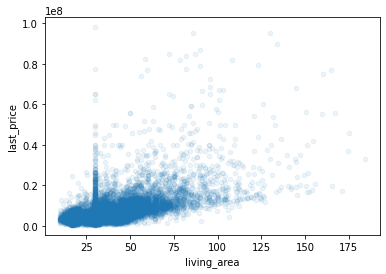

In [102]:
# построить диаграмму рассеяния (жилая площадь и цена)
data.plot(kind='scatter', x='living_area', y='last_price', alpha=0.08)

# определить коэффициент корреляции
print('Коэффициент корреляции = ', data['living_area'].corr(data['last_price']))

<b>Вывод:</b> Коэффициент корреляции равен 0,596, это значит, что цена заметно зависит от жилой площади квартиры. Чем больше жилая площадь, тем больше стоимость квартиры, но так бывает не всегда.

Коэффициент корреляции =  0.5495697383991867


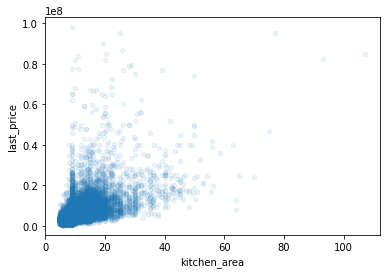

In [103]:
# построить диаграмму рассеяния (площадь кухни и цена)
data.plot(kind='scatter', x='kitchen_area', y='last_price', alpha=0.08)

# определить коэффициент корреляции
print('Коэффициент корреляции = ', data['kitchen_area'].corr(data['last_price']))

<b>Вывод:</b> Коэффициент корреляции равен 0,55, это значит, что цена умеренно зависит от площади кухни. Чем больше площадь кухни, тем больше стоимость квартиры, но так бывает не всегда.

Коэффициент корреляции =  0.4342998612042345


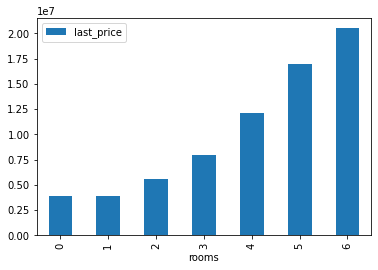

In [104]:
# построить столбчатую диаграмму (количество комнат и цена)
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

# определить коэффициент корреляции
print('Коэффициент корреляции = ', data['rooms'].corr(data['last_price']))

<b>Вывод:</b> Коэффициент корреляции равен 0,43, это значит, что цена умеренно зависит от количества комнат. Чем больше комнат, тем больше стоимость квартиры, но так бывает не всегда.

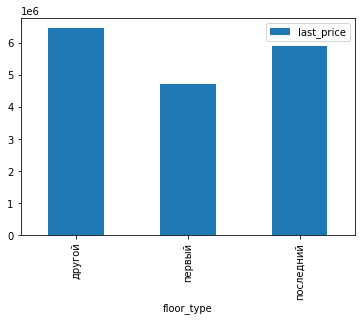

In [105]:
# построить столбчатую диаграмму (типа этажа и цена)
(
    data.pivot_table(index='floor_type',values='last_price')
    .plot(y='last_price', kind='bar')
);


<b>Вывод:</b> Коэффициент корреляции очень слабый, это значит, что цена не зависит от этажа, на котором расположена квартира (первый, последний, другой).

Коэффициент корреляции =  -0.003515683308839101


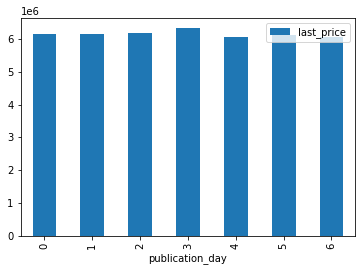

In [106]:
# построить столбчатую диаграмму (день публикации и цена)
(
    data.pivot_table(index='publication_day',values='last_price')
    .plot(y='last_price', kind='bar')
);

print('Коэффициент корреляции = ', data['publication_day'].corr(data['last_price']))

<b>Вывод:</b> Коэффициент корреляции очень слабый, это значит, что цена не зависит от дня публикации объявления.

Коэффициент корреляции =  0.0038493492720681343


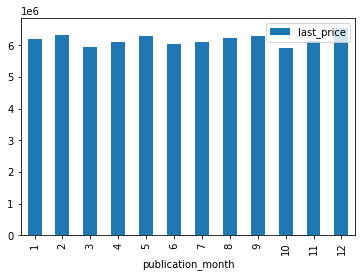

In [107]:
# построить столбчатую диаграмму (месяц публикации и цена)
(
    data.pivot_table(index='publication_month',values='last_price')
    .plot(y='last_price', kind='bar')
);

print('Коэффициент корреляции = ', data['publication_month'].corr(data['last_price']))

<b>Вывод:</b> Коэффициент корреляции очень слабый, это значит, что цена не зависит от месяца публикации объявления.

Коэффициент корреляции =  -0.04129811644280506


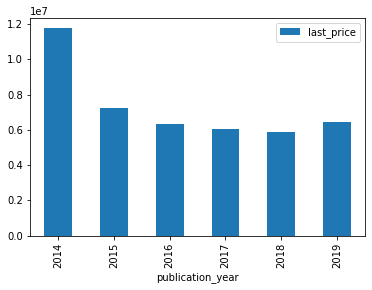

In [108]:
# построить столбчатую диаграмму (год публикации и цена)
(
    data.pivot_table(index='publication_year',values='last_price')
    .plot(y='last_price', kind='bar')
);

print('Коэффициент корреляции = ', data['publication_year'].corr(data['last_price']))

<b>Вывод:</b> Коэффициент корреляции очень слабый, это значит, что цена не зависит от года публикации объявления.

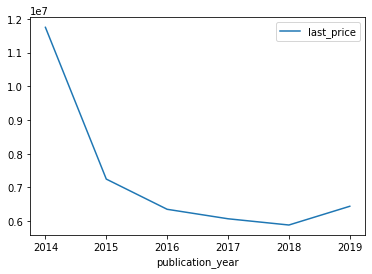

In [109]:
(
    data.pivot_table(index='publication_year',values='last_price', aggfunc = 'mean')
    .plot()
);

In [110]:
# сводная таблица
year_table = data.pivot_table(index='publication_year', values=['total_area', 'last_price'], aggfunc=['count', 'median'])

# переименовать столбцы
year_table.columns=['price_count', 'area_count', 'price_median', 'area_median']

year_table

,price_count,area_count,price_median,area_median
publication_year,,,,
2014,106,106,7488280,75.25
2015,1020,1020,5200000,59.80
2016,2513,2513,4600000,54.20
2017,7378,7378,4575000,53.00
2018,7493,7493,4700000,52.30
2019,2607,2607,5100000,52.10


<b>Вывод:</b> С 2014 по 2017 года количество объявлений росло. В 2018-2019 годах количество объявлений уменьшилось. Пик по количеству объявлений пришёлся на 2017 год. Средняя площадь квартир с каждым годом становилась меньше, а вот чётких тенденций в изменении стоиомсти объектов не прослеживается.

In [111]:
print('Коэффициент корреляции = ', data['publication_year'].corr(year_table['area_median']))

Коэффициент корреляции =  -0.35826964277968687


<b>Вывод:</b> Коэффициент корреляции равен -0,36, это значит, что средняя площадь квартиры незначительно зависит от года публикации объявления. Чем больше год, тем меньше площадь квартиры.

In [112]:
print('Коэффициент корреляции = ', data['publication_year'].corr(year_table['price_count']))

Коэффициент корреляции =  0.33206580526481533


<b>Вывод:</b> Коэффициент корреляции равен 0,17, это значит, что количество объявлений незначительно зависит от года публикации объявления. Чем больше год, тем больше объявлений, но так бывает не всегда.

#### <a class="anchor" name="fourth-fourth">Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a>

,price_count,area_count,price_sum,area_sum,price_per_1_sq_m
locality_name,,,,,
санкт-петербург,"14,339.00","14,339.00","106,174,216,078.00","903,136.76","117,561.62"
поселок шушары,415.00,415.00,"1,730,078,999.00","22,710.01","76,181.34"
поселок мурино,381.00,381.00,"1,500,591,318.00","18,336.41","81,836.70"
всеволожск,365.00,365.00,"1,405,306,426.00","20,850.45","67,399.33"
пушкин,342.00,342.00,"2,148,697,964.00","20,528.80","104,667.49"
колпино,327.00,327.00,"1,268,626,721.00","17,192.24","73,790.66"
гатчина,289.00,289.00,"1,014,879,360.00","14,807.98","68,535.98"
деревня кудрово,246.00,246.00,"1,100,876,825.00","12,238.35","89,953.04"
выборг,209.00,209.00,"705,393,000.00","12,110.96","58,244.19"


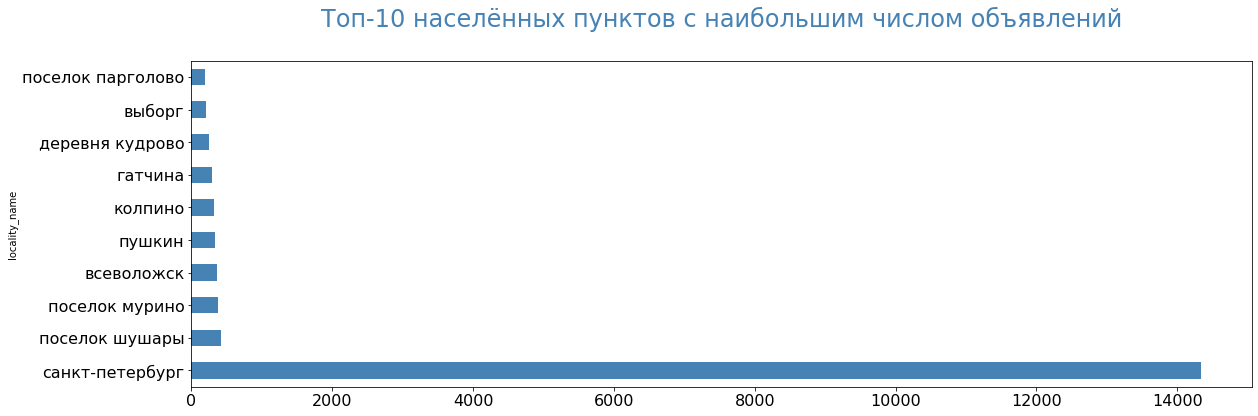

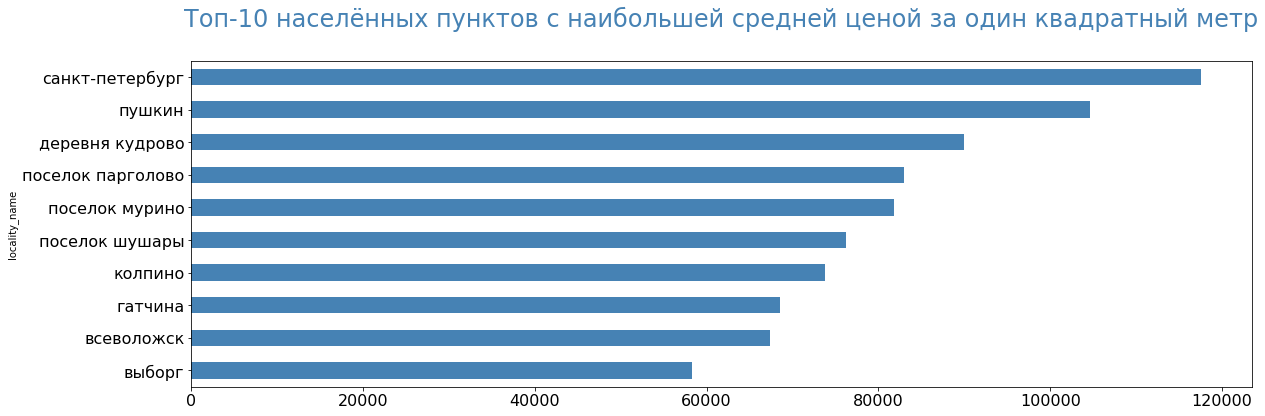

In [113]:
# сводная таблица
locality_name_top = data.pivot_table(index='locality_name', values=['last_price', 'total_area'], aggfunc=['count', 'sum'])

# переименовать столбцы
locality_name_top.columns=['price_count', 'area_count', 'price_sum', 'area_sum']

# отсортировать значения по убыванию, ориентируясь на количество повторений
locality_name_top.sort_values(by='price_count', ascending=False, inplace=True)

# посчитать стоимость 1 кв.м.
locality_name_top['price_per_1_sq_m'] = locality_name_top['price_sum'] / locality_name_top['area_sum']

(
    locality_name_top.head(10)
    .plot(kind = 'barh', y='price_count', figsize = (19,6), rot = 0, legend = False, fontsize = 16, color = 'SteelBlue')
    .set_title('Топ-10 населённых пунктов с наибольшим числом объявлений' + "\n", fontsize = 24, color = 'SteelBlue')    
);

(
    locality_name_top.head(10)
    .sort_values(by='price_per_1_sq_m')
    .plot(kind = 'barh', y='price_per_1_sq_m', figsize = (19,6), rot = 0, legend = False, fontsize = 16, color = 'SteelBlue')
    .set_title('Топ-10 населённых пунктов с наибольшей средней ценой за один квадратный метр' + "\n", fontsize = 24, color = 'SteelBlue')    
);

#вывести топ-10 населённых пунктов с наибольшим числом объявлений
locality_name_top.head(10).style.format("{:,.2f}")

<b>Вывод:</b> Больше всего объявлений в Санкт-Петербурге, там же самая дорогая цена за 1 кв.м.

#### <a class="anchor" name="fourth-fifth">Средня цена каждого километра в Санкт-Петербурге</a>

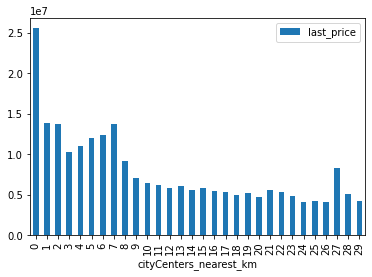

In [114]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(
        index='cityCenters_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
);

<b>Вывод:</b> Наибольшая цена приходится на квартиры, которые находятся в радиусе 1 км от центра Санкт-Петербурга. После 7 км цены уменьшаются. Заметен небольшой всплеск на 27 км от центра города.

In [115]:
data.loc[(data.cityCenters_nearest_km == 27) & (data.locality_name == 'санкт-петербург'), :]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_1_sq_m,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km,floor_type_2
655,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,NaN,128,193918.918919,1,11,2017,другой,27,0
5339,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0.0,NaN,178,70312.500000,1,2,2018,последний,27,2


На 27-м километре есть всего две квартиры. Цена одной из них больше 14 миллионов рублей. Именно этот фактор вызвал такой всплеск в срднем значении стоимости объектов. Проанализировав записи, можно сказать следующее: площадь квартиры 74 кв.м., комнат 2, высота потолков больше 3 метров, этажей всего в доме 5, жилая площадь 30 кв.м., площадь кухни 25 кв.м. Есть предположение, что это старый дом.

In [116]:
spb_3km_df = data.query('locality_name == "санкт-петербург" & cityCenters_nearest_km == 3')

spb_3km_df.groupby(['floor_type']).count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1_sq_m,publication_day,publication_month,publication_year,cityCenters_nearest_km,floor_type_2
floor_type,,,,,,,,,,,,,,,,,,,,,
другой,188,188,188,188,188,188,188,188,188,188,...,129,188,139,188,188,188,188,188,188,188
первый,51,51,51,51,51,51,51,51,51,51,...,39,51,44,51,51,51,51,51,51,51
последний,71,71,71,71,71,71,71,71,71,71,...,49,71,60,71,71,71,71,71,71,71


In [117]:
spb_5km_df = data.query('locality_name == "санкт-петербург" & cityCenters_nearest_km == 5')

spb_5km_df.groupby(['floor_type']).count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1_sq_m,publication_day,publication_month,publication_year,cityCenters_nearest_km,floor_type_2
floor_type,,,,,,,,,,,,,,,,,,,,,
другой,628,628,628,628,628,628,628,628,628,628,...,343,628,418,628,628,628,628,628,628,628
первый,69,69,69,69,69,69,69,69,69,69,...,52,69,34,69,69,69,69,69,69,69
последний,115,115,115,115,115,115,115,115,115,115,...,70,115,54,115,115,115,115,115,115,115


<b>Вывод:</b> Больше всего квартир на 3 и 5 км находятся на любом этаже, кроме первого и последнего, меньше всего квартир находится на первом этаже.

In [118]:
spb_5km_df = data.query('locality_name == "санкт-петербург" & cityCenters_nearest_km == 5')

spb_5km_df.groupby(['floor_type'])['floor_type'].count().to_frame()

,floor_type
floor_type,
другой,628
первый,69
последний,115


<b>ИТОГИ</b>
1. После изучения параметров можно сделать следующие выводы: больше всего квартир с общей площадью 50 кв.м., с жилой площадью 18 и 30 кв.м., площадью кухни 9 кв.м. Больше всего объявлений о продаже 1-, 2-, 3-комнатных квартир, с высотой потолков 2,65 метра, квартир, которые на ходятся на первых пяти этажах, в пятиэтажных и девятиэтажных домах, которые находятся в 10-15 километрах от центра города, 10-30 километрах от аэропорта, на расстоянии до 750 метров до ближайшего парка. Чаще всего объявления пубоикуются в феврале.

2. Среднее количество дней с момента публикации объявления до продажи составляет 146 дней. Медианное значение количества дней с момента публикации объявления до продажи составляет 114 дней.

3. Больше всего на стоимость квартиры влияют следующие факторы: площадь квартиры, жилая площадь квартиры, площадь кухни и количество комнат. Этаж, на котором расположена квартира, и дата публикации объявления не влияют на стоимость квартиры. 

4. Самая дорогая недвижимость находится в Санкт-Петербурге. 

5. Самая дорогая недвижимость находится в радиусе 1 км от центра Санкт-Петербурга.

### <a class="anchor" name="fifth">Общий вывод

1. <b>Была проведена предобработка данных</b>  
    - Определено, в каких столбцах были пропуски.
    - Заполнены пропущенные значения там, где это возможно.  
       
Пропуски в <code>ceiling_height</code>, <code>floors_total</code>, <code>living_area</code>, <code>kitchen_area</code> заполнены медианными значениями. В <code>balcony</code> и <code>days_exposition</code> пропуски заполнены нулевыми значениями. В <code>is_apartment</code> пропуски заполнены значениями False.  
    
Тип данных в <code>first_day_exposition</code> изменён на datetime, так как это дата. Тип данных в <code>days_exposition</code> изменён на int, так как количество дней - целое число. Тип данных <code>balcony</code> изменён на int, так как количество балконов - целое число. Тип данных <code>last_price</code> изменён на int, так как стоимость - целое число. Тип данных <code>floors_total</code> изменён на int, так как количество этажей - целое число.
    
В <code>locality_name</code> все значения приведены к нижнему регистру, была проведена замена ё на е, заменено "городской поселок" на "поселок городского типа".  
    
В <code>total_area</code> удалены квартиры, площадь которых меньше 20 и больше 250 кв.м., так как они довольно редкие. В <code>rooms</code> удалены квартиры, в которых больше 6 комнат, так как это встречается довольно редко. В <code>last_price</code> удалены квартиры стоимостью до 100 000 и больше 100 000 000. В <code>floors_total</code> удалены квартиры, которые находятся в домах, где больше 25 этажей, так как такие объявления можно считать редкостью. Значения в <code>ceiling_height</code> от 25 до 35 изменили на вещественные (от 2,5 метров до 3,5 метров), то есть эти значения разделили на десять. Значения от 4 до 25 и больше 35 удалили. Значения в <code>living_area</code> меньше 10 и больше 300 удалили. Значения в <code>kitchen_area</code> меньше 5 удалили. Удалили в <code>airports_nearest</code> строки, где расстояние до аэропорта всего 0 метров. Значения в <code>cityCenters_nearest</code> больше 40 000 удалили. Значения в <code>parks_nearest</code>, которые меньше 10, удалили. В <code>days_exposition</code> удалили значения, больше 1200. Обновили индексацию.
        
    - Указаны причины, которые могли привести к пропускам в данных
2. <b>В таблицу добавлены новые столбцы</b>
    - Добавлени новый столбец <code>price_per_1_sq_m</code>, в котором посчитана цена за 1 кв.м. 
    - Добавлени новый столбец <code>publication_day</code>, в котором указан день публикации объявления. 
    - Добавлени новый столбец <code>publication_month</code>, в котором указан месяц публикации объявления.
    - Добавлени новый столбец <code>publication_year</code>, в котором указан год публикации объявления.
    - Добавлени новый столбец <code>floor_type</code>, в котором благодаря функции <code>categorize_floor</code> указан тип этажа.
    - Добавлени новый столбец <code>cityCenters_nearest_km</code>, в котором посчитано расстояние до центра города в км. 
3. <b>Проведён исследовательский анализ данных</b>
    - Больше всего квартир с общей площадью 50 кв.м., с жилой площадью 18 и 30 кв.м., площадью кухни 9 кв.м. Больше всего объявлений о продаже 1-, 2-, 3-комнатных квартир, с высотой потолков 2,65 метра, квартир, которые на ходятся на первых пяти этажах, в пятиэтажных и девятиэтажных домах, которые находятся в 10-15 километрах от центра города, 10-30 километрах от аэропорта, на расстоянии до 750 метров до ближайшего парка. Чаще всего объявления пубоикуются в феврале.  
  
    - Среднее количество дней с момента публикации объявления до продажи составляет 146 дней. Медианное значение количества дней с момента публикации объявления до продажи составляет 114 дней.  
  
    - Больше всего на стоимость квартиры влияют следующие факторы: площадь квартиры, жилая площадь квартиры, площадь кухни и количество комнат. Этаж, на котором расположена квартира, и дата публикации объявления не влияют на стоимость квартиры.  
  
    - Самая дорогая недвижимость находится в Санкт-Петербурге.  
  
    - Самая дорогая недвижимость находится в радиусе 1 км от центра Санкт-Петербурга.